In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

**Load Data**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Preparing Data**

In [3]:
# normalizing data (0-255)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 28*28 pixels to 1d 
input_size = 28 * 28
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

# labels to 1 of 10 categories (One-hot Encoding) 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Model Structure**

input: 784 neurons (28 * 28 pixels)

layer 1: 64 neurons, relu

layer 2: 32 neurons, relu

output: 10 neurons (10 categories), softmax

I use `adam` optimizer as it is the most common.

I also use `Categorical Cross Entropy` loss function as the problem is multi-class.

In [4]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_size,)),
    Dropout(0.2), 
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  
])

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Training Model**

In [84]:
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    batch_size=128, 
                    validation_split=0.2, 
                    verbose=2)

Epoch 1/20
375/375 - 3s - loss: 0.8636 - accuracy: 0.7024 - val_loss: 0.4762 - val_accuracy: 0.8318 - 3s/epoch - 7ms/step
Epoch 2/20
375/375 - 2s - loss: 0.5398 - accuracy: 0.8143 - val_loss: 0.4230 - val_accuracy: 0.8484 - 2s/epoch - 4ms/step
Epoch 3/20
375/375 - 2s - loss: 0.4815 - accuracy: 0.8308 - val_loss: 0.3976 - val_accuracy: 0.8590 - 2s/epoch - 4ms/step
Epoch 4/20
375/375 - 2s - loss: 0.4481 - accuracy: 0.8422 - val_loss: 0.3761 - val_accuracy: 0.8648 - 2s/epoch - 4ms/step
Epoch 5/20
375/375 - 3s - loss: 0.4252 - accuracy: 0.8487 - val_loss: 0.3698 - val_accuracy: 0.8668 - 3s/epoch - 7ms/step
Epoch 6/20
375/375 - 2s - loss: 0.4094 - accuracy: 0.8550 - val_loss: 0.3596 - val_accuracy: 0.8715 - 2s/epoch - 5ms/step
Epoch 7/20
375/375 - 1s - loss: 0.3996 - accuracy: 0.8585 - val_loss: 0.3559 - val_accuracy: 0.8732 - 817ms/epoch - 2ms/step
Epoch 8/20
375/375 - 2s - loss: 0.3899 - accuracy: 0.8619 - val_loss: 0.3540 - val_accuracy: 0.8706 - 2s/epoch - 5ms/step
Epoch 9/20
375/375 - 

**Evaluation**

In [85]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 - 1s - loss: 0.3575 - accuracy: 0.8749 - 934ms/epoch - 3ms/step
Test accuracy: 87.49%


**Plot**

In [52]:
import matplotlib.pyplot as plt

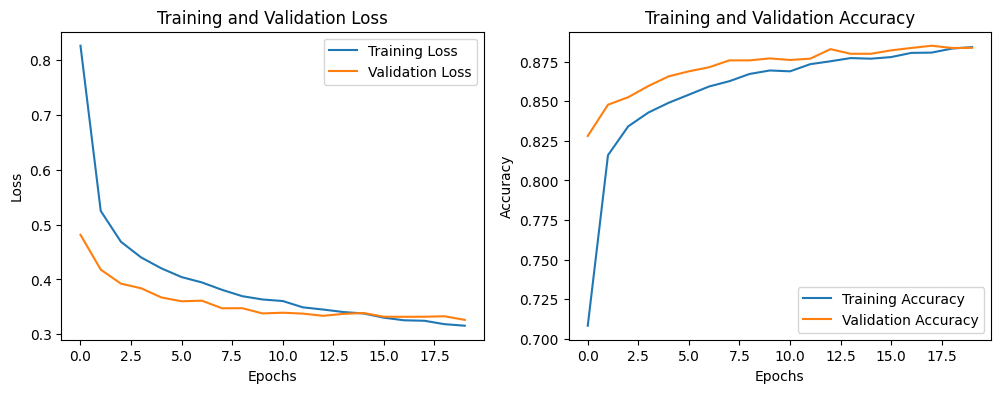

In [72]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Another Model**

Layer 1: 128, ReLu

Layer 2: 64, ReLu

Test Acc.: 88.20%

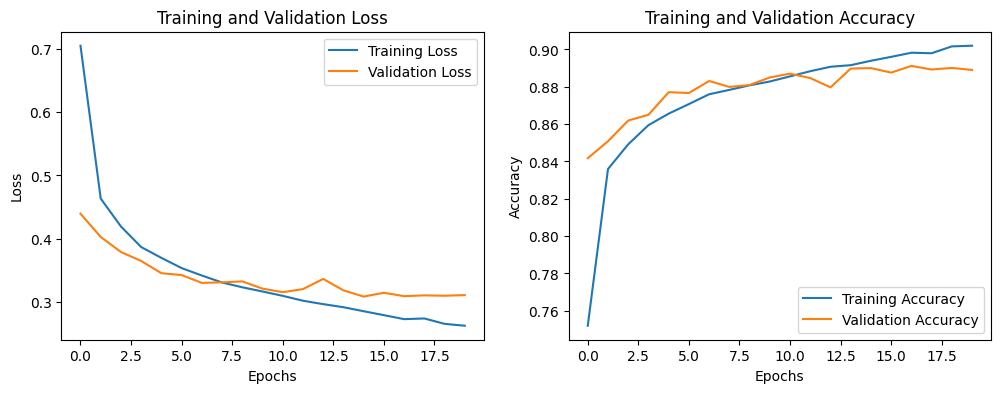

In [81]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()